# Office Data Exploration (Wednesday 28 May 2025)

In this notebook, we explore the sound features and properties of an average day at work.

We recorded a 5 hour segment. This was broken down into 30 second windows and then pro-processed.
For each 30 second file, we extracted 8 features:

1. RMS: average power of the audio signal over time. Provides a quantitative measure of loudness. Useful for detecting quiet vs. loud segments and overall energy levels in the soundscape.
2. Spectral Centroid: “center of mass” of the frequency spectrum. Higher centroid = brighter or sharper sounds; lower centroid = duller or bass-heavy sounds. Useful for distinguishing tonal qualities and harshness.
3. Spectral Flatness: how noise-like or tonal a sound is. High flatness = broadband noise (e.g. chatter); low flatness = pure tone. Important for characterising sound texture.
4. Spectral Bandwidth: spread of frequencies around the centroid. Captures richness or narrowness of sound. Useful for identifying broadband natural ambiences vs. narrow tonal noises.
5. Zero-Crossing Rate (ZCR): how often the waveform crosses zero amplitude. High ZCR = noisy, transient-heavy sounds. Useful for detecting disruptions and percussive noise.
6. Amplitude Envelope: shape of the signal’s amplitude over time, capturing changes. Useful for identifying attack, sustain, and decay patterns in sounds.
7. Onset Density: Number of onset peaks (sudden energy changes) per time window. High onset density indicates a busy or active soundscape. Important for identifying calm vs. active segments.
8. Inter-Onset Interval (IOI): Average time gap between successive onsets. Indicates rhythmic regularity. Useful for detecting natural, wave-like rhythms vs. irregular office noise.

In summary, feature Descriptions and Purposes:
1. RMS: average loudness - for loud/quiet differentiation
2. Centroid: brightness - for tonal balancing
3. Flatness: noise-like vs tonal - for texture
4. Bandwidth: richness/spread - for spectral shaping
5. ZCR: noisiness/transients - for identifying disruptions
6. Envelope: dynamic shape - for smoothing dynamics
7. Onset Density: busy-ness - for calm vs active parts
8. IOI: rhythmic regularity - for natural sound flow
   
Could add the following features later:

1. Low-Frequency Energy Ratio: HVAC, distant traffic often dominate low frequencies;
2. Spectral Roll-off: captures how “bright” or “dull” a sound is overall, helps mimic nature’s spectral slopes
3. Spectral Contrast: useful for texture/richness analysis, e.g. noisy chatter vs. clean HVAC hum
4. Autocorrelation Peaks: Useful for periodic or repetitive mechanical sounds (e.g. typing)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [22]:
df = pd.read_csv("../features/extracted-features.csv")
df['segment_index'] = df['filename'].str.extract(r'(\d+)').astype(int)
df = df_sorted = df.sort_values('segment_index').reset_index(drop=True)
df.head()

,filename,rms,centroid,flatness,bandwidth,zcr,envelope,onset_density,ioi,segment_index
0,segment_000.wav,0.026692,1643.510104,0.000246,2266.683536,0.037602,0.032326,2.700000,22.875000,0
1,segment_001.wav,0.028553,1047.203808,0.000141,2109.173426,0.011113,0.037101,1.366667,44.125000,1
2,segment_002.wav,0.085218,1448.628954,0.000194,2362.662604,0.024008,0.110455,4.233333,13.349206,2
3,segment_003.wav,0.124351,934.990339,0.000102,2022.526894,0.009079,0.164760,1.233333,50.277778,3
4,segment_004.wav,0.109196,1157.736601,0.000134,2183.095778,0.014558,0.142452,2.233333,28.181818,4


In [36]:
print(os.getcwd())

/Users/shrutirao/Documents/projects/study-3/biophilic-sound-engine/notebooks


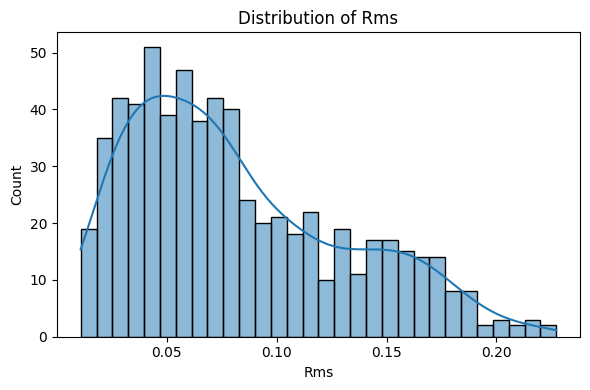

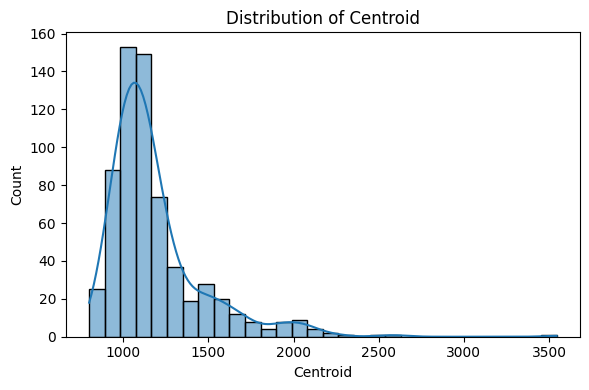

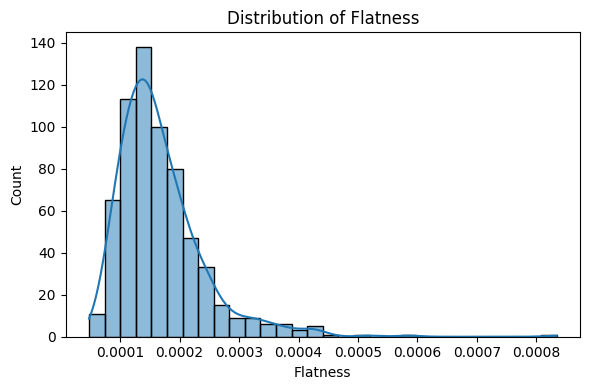

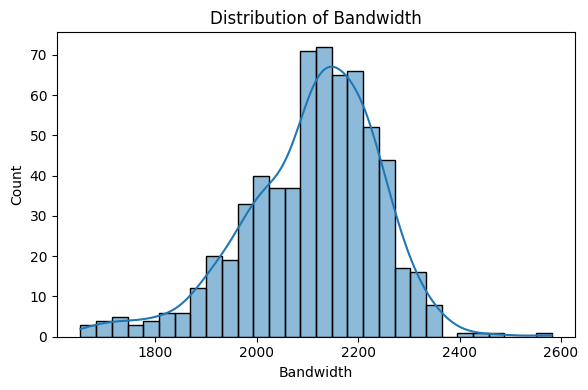

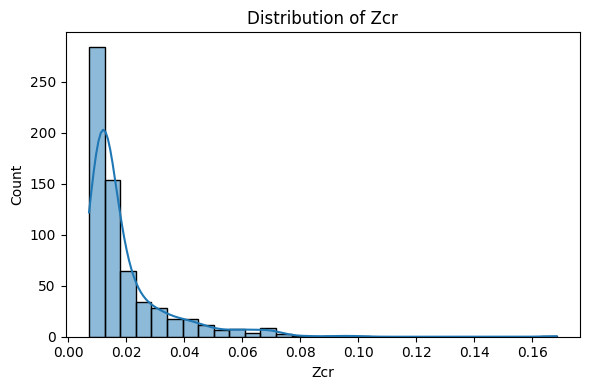

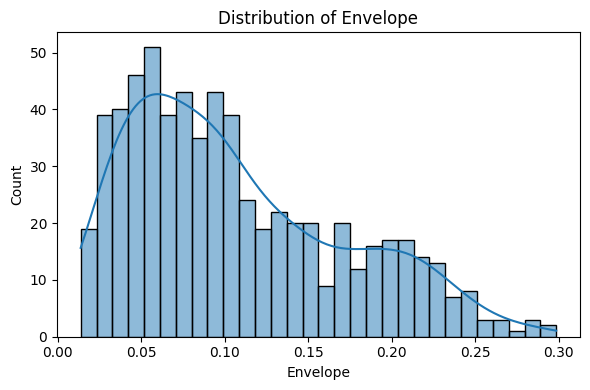

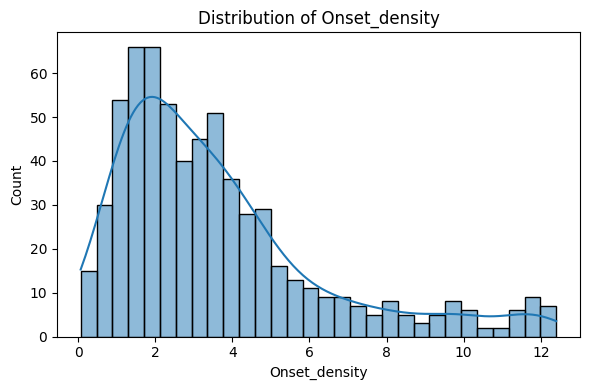

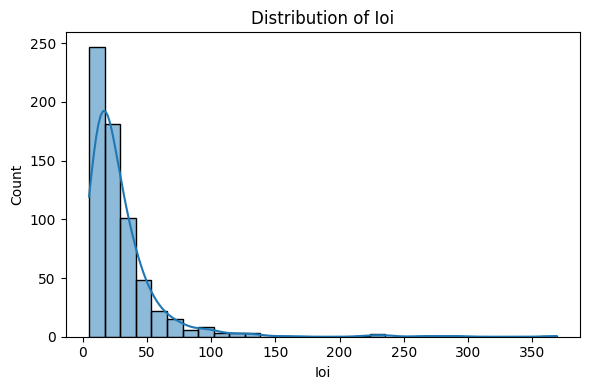

In [40]:
features_to_plot = ['rms', 'centroid', 'flatness', 'bandwidth', 'zcr', 'envelope', 'onset_density', 'ioi']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.tight_layout()
    output_path = f"../data/plots/{feature}-distribution.png"
    plt.savefig(output_path)

RMS Distribution: Right-skewed (most segments are low RMS, some louder). Office recordings have a majority of quiet segments (background HVAC, distant chatter). Occasional loud events pull the tail rightward — door slams, close conversations. Relevance: Explore compressing or expanding this range to match natural dynamic range (forest sounds, for example, might have a more continuous RMS variation.

Spectral Centroid Distribution: Right-skewed (most segments have low centroid).
Most office sounds are dull or mid-range in brightness (HVAC, low chatter). Occasional sharp, bright sounds (typing, door slam) create the long tail. Relevance: In nature, centroid tends to be softer/warmer. Potential transformation could be to smooth out harsh brightness peaks to mimic gentle natural tones.

Spectral Flatness Distribution: Strongly skewed — most segments are low flatness. Majority of office segments are more tonal, steady sounds. Fewer segments are noisy (chatter, typing). Relevance: Nature has a mix of tonal and broadband textures — you can use flatness to modulate textural balance.


Spectral Bandwidth Distribution: Bell-shaped (more symmetric). Bandwidth is fairly stable around 2000–2200 Hz for most segments. Bandwidth does not vary as much as RMS or centroid. Relevance: Could be used as a targeted transformation dimension — e.g., to enrich spectral complexity in nature-inspired augmentation.

Envelope Distribution: Left-skewed — most segments have low average envelope, fewer with high dynamic fluctuations. Many segments have calm, stable envelopes. Some have sudden dynamic bursts. Relevance: Nature’s envelope shapes often breathe gently — transformation logic might emphasize smoother amplitude modulation.

ZCR Distribution: Strong right-skew. Most office segments are low in transient activity. Occasional high ZCR = sudden, noisy events (e.g., typing). Relevance:Nature’s environments generally have low ZCR (noisy water is an exception). Good dimension to smooth out harsh office noise transients.

Onset Density Distribution: Right-skewed — most segments have low onset density. Office is usually quiet with few sudden events. Some busy intervals (people moving around, typing bursts). Relevance: Nature can have rich but balanced onset density (rustling leaves, bird calls). Could guide how you modulate office sound “busy-ness.”

Inter-Onset Interval (IOI) Distribution: Right-skewed — mostly large IOI (quiet gaps), some smaller (bursty events). Most of the office environment is calm — few repeated rhythmic events. Nature’s rhythms tend to have smooth, wave-like periodicity — this can inform transformation logic to smooth out disruptive mechanical repetition.

# Correlations

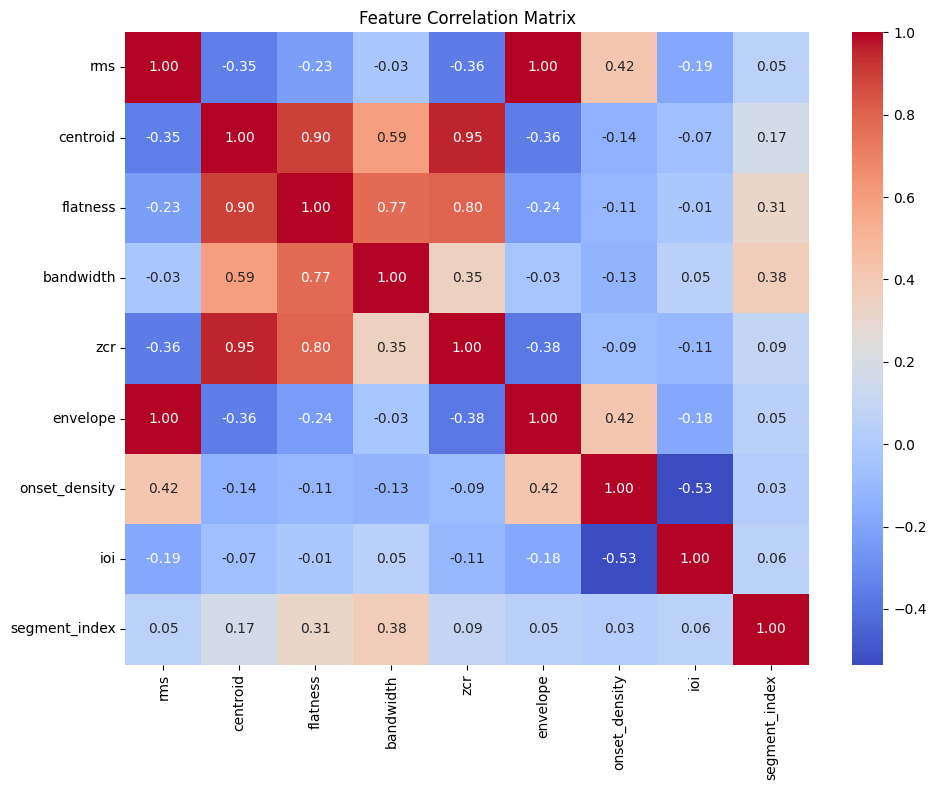

<Figure size 640x480 with 0 Axes>

In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()
output_path = f"../data/plots/feature-correlations.png"
plt.savefig(output_path)

Keep for transformations:
1. RMS: Loudness
2. Centroid: Brightness
3. Bandwidth: Richness
4. Flatness: Texture
5. ZCR: Transients/noisiness
6. Onset_density

Either IOI or Onset Density (not both, pick your rhythm dimension)

Can consider dropping for transformation:
1. Envelope — since using RMS.
2. IOI 

# Pairplots
To identify linear vs non linear functions for transformation (and additional verification of positive or negative relaton and correlation)

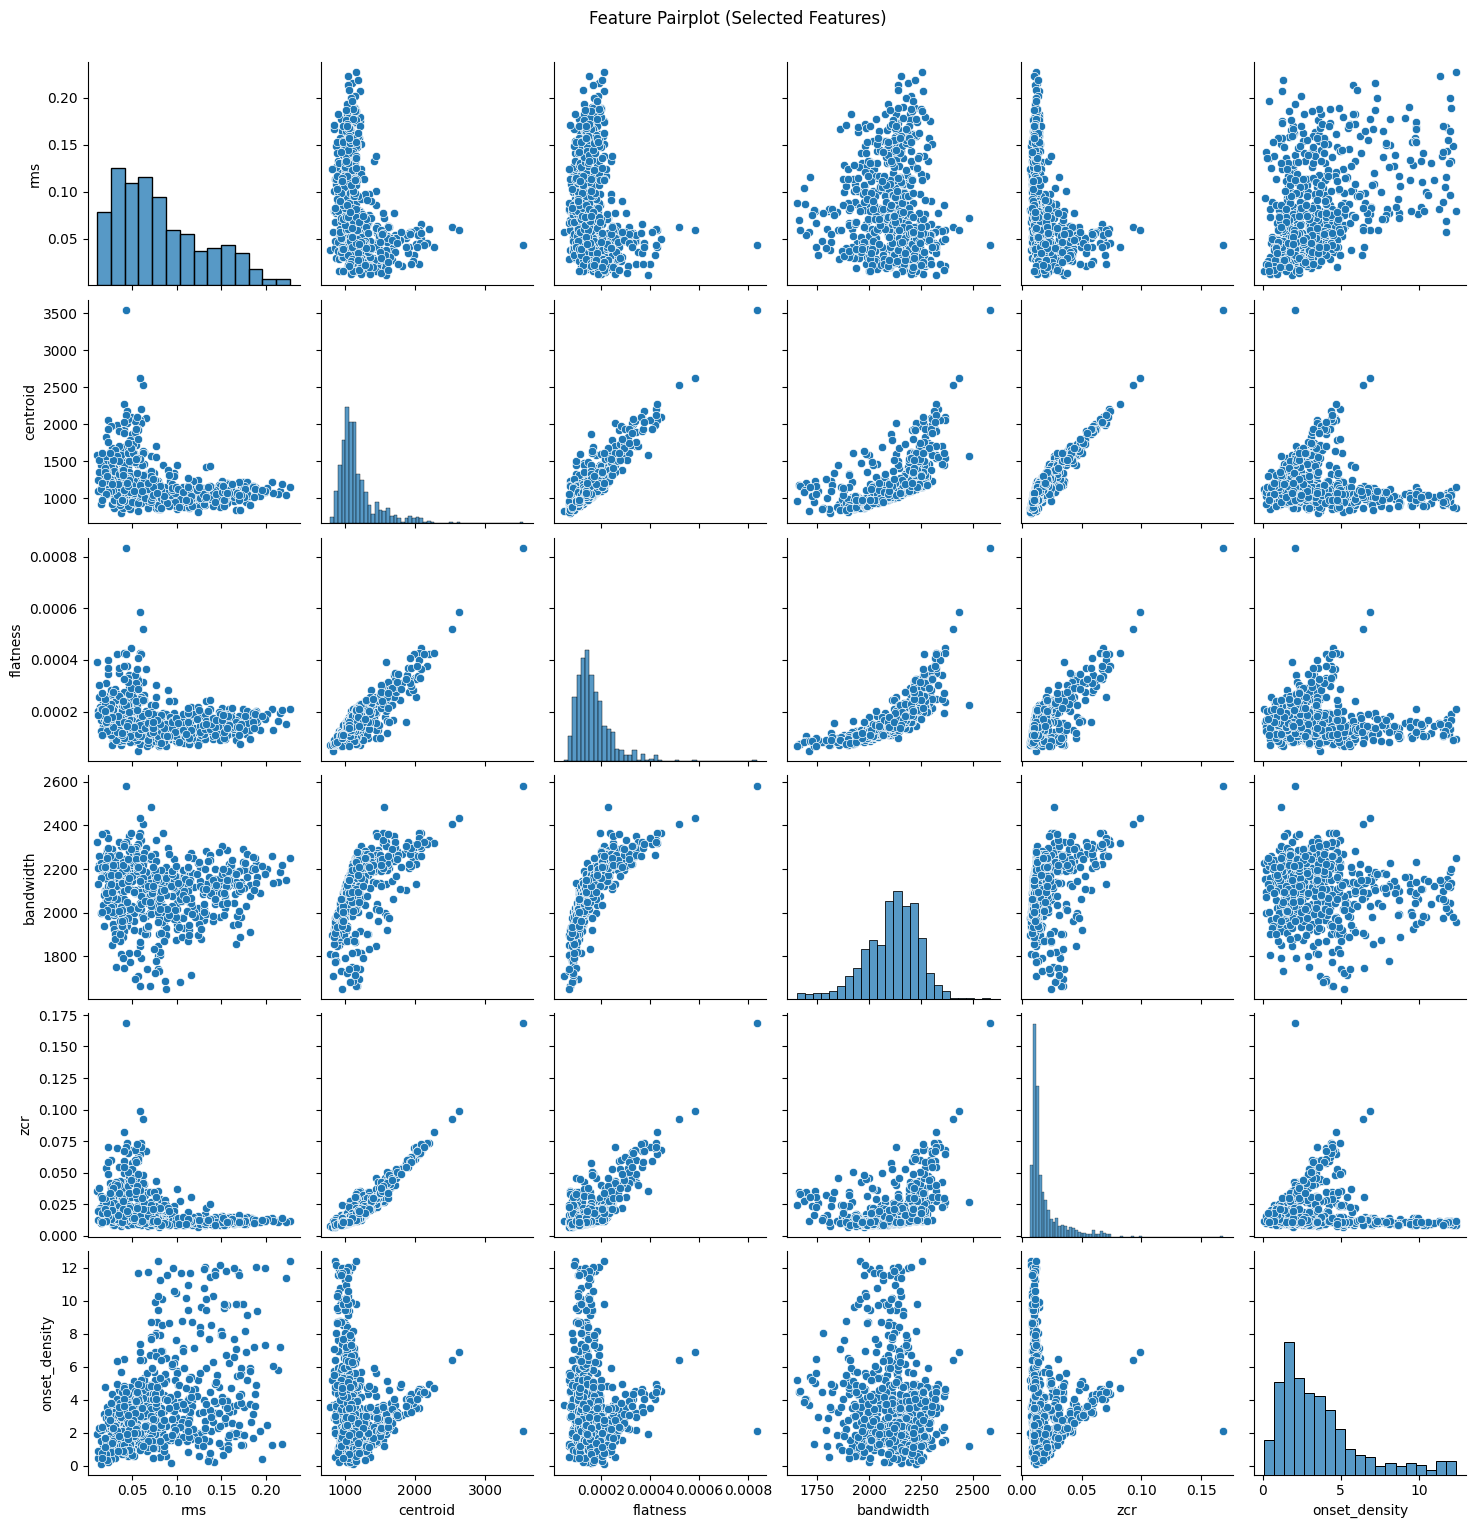

In [49]:
selected_features = ['rms', 'centroid', 'flatness', 'bandwidth', 'zcr', 'onset_density']
sns.pairplot(df[selected_features])
plt.suptitle("Feature Pairplot (Selected Features)", y=1.02)
output_path = f"../data/plots/feature-pairplots.png"
plt.savefig(output_path)

✅ Variability — Do features vary enough to distinguish sounds?
✅ Potential thresholds — E.g., low vs. high centroid or flatness to separate tonal vs. noisy sounds
✅ Feature redundancy — E.g., if centroid and bandwidth are strongly correlated, you might not need both
✅ Insights for design — How might these features reflect real office sounds vs. biophil

# BoxPlots for Each Feature

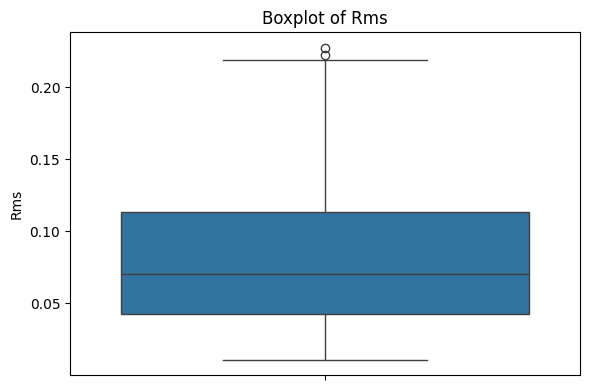

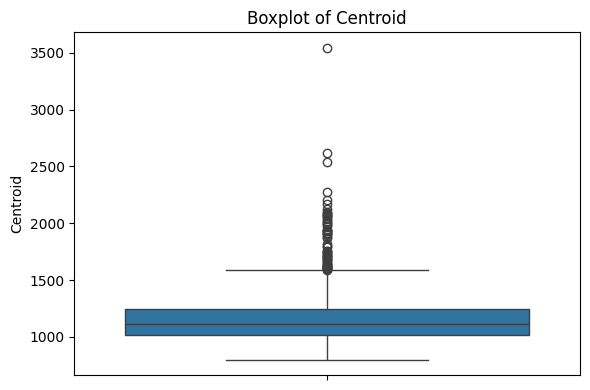

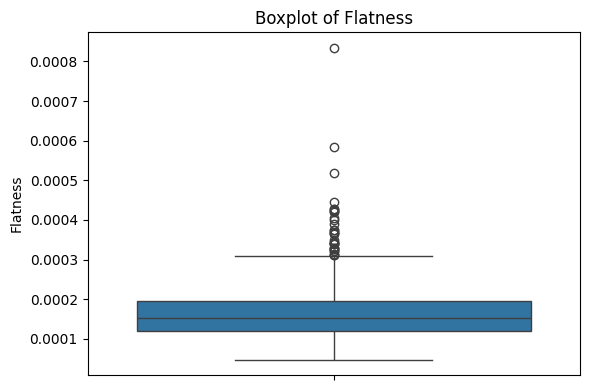

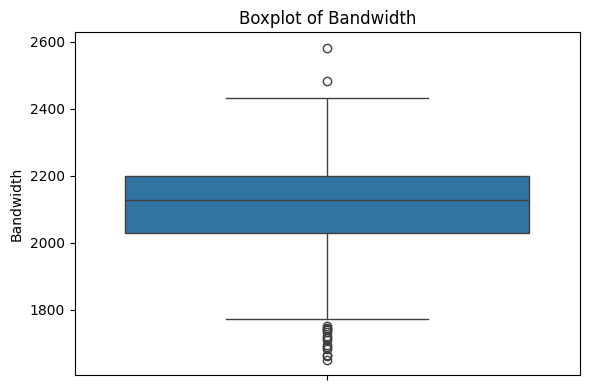

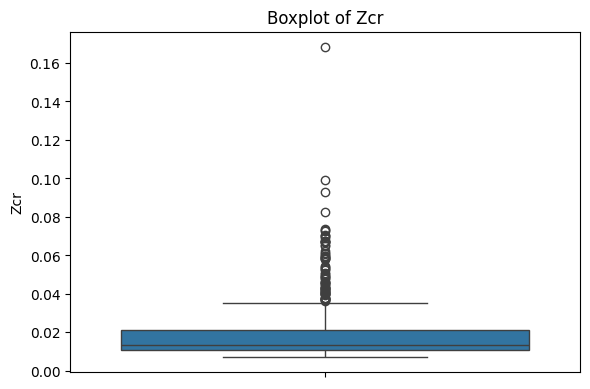

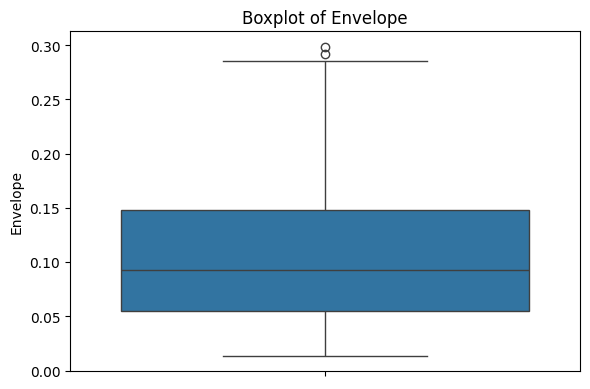

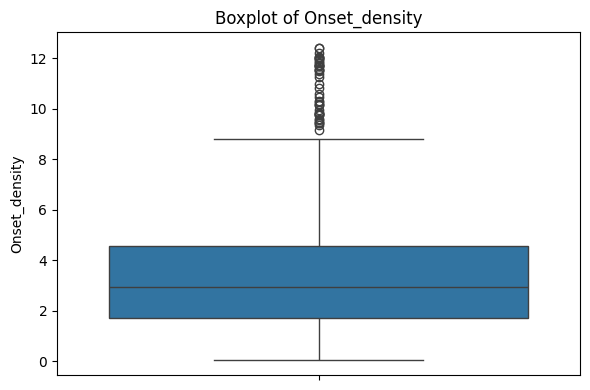

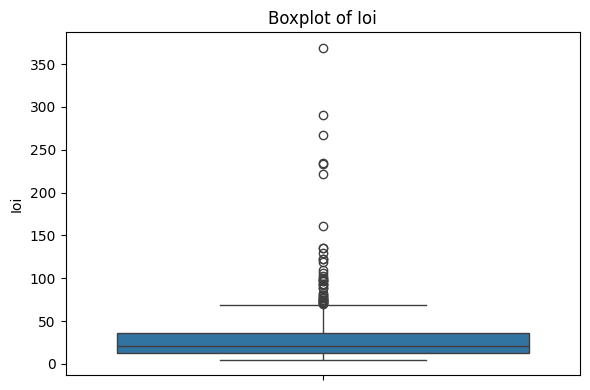

In [5]:
features_to_plot = ['rms', 'centroid', 'flatness', 'bandwidth', 'zcr', 'envelope', 'onset_density', 'ioi']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()


# Scatter Plots for Key Feature Pairs

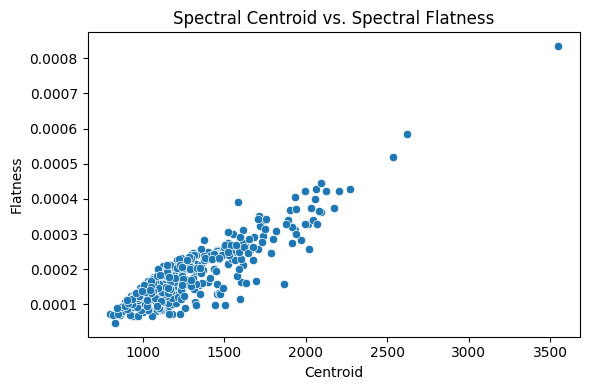

In [6]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['centroid'], y=df['flatness'])
plt.title("Spectral Centroid vs. Spectral Flatness")
plt.xlabel("Centroid")
plt.ylabel("Flatness")
plt.tight_layout()
plt.show()


# PCA

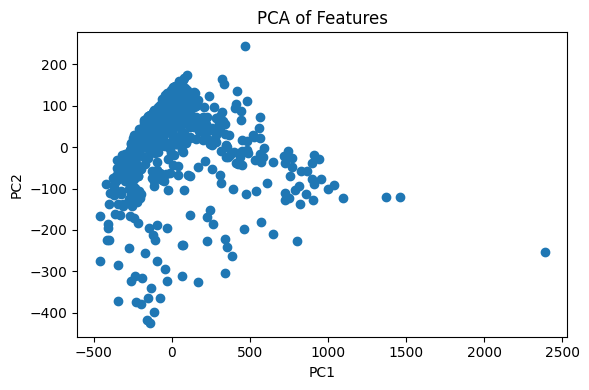

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)

plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:,0], pca_result[:,1])
plt.title("PCA of Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

1 cluster with lots of little points around


In [64]:
import IPython.display as ipd
from IPython.display import HTML

# Load the dataframe
df_subset = df.head(20)  # Take the first 10 segments as an example

# Create HTML table
table_html = "<table border='1'><tr><th>Segment</th><th>RMS</th><th>Centroid</th><th>Flatness</th><th>Play</th></tr>"
for idx, row in df_subset.iterrows():
    audio_path = f"../data/processed/{row['filename']}"
    audio_html = f"<audio controls src='{audio_path}'></audio>"
    table_html += f"<tr><td>{row['filename']}</td><td>{row['rms']:.4f}</td><td>{row['centroid']:.1f}</td><td>{row['flatness']:.4f}</td><td>{audio_html}</td></tr>"
table_html += "</table>"

# Display table
HTML(table_html)


Segment,RMS,Centroid,Flatness,Play
segment_000.wav,0.0267,1643.5,0.0002,
segment_001.wav,0.0286,1047.2,0.0001,
segment_002.wav,0.0852,1448.6,0.0002,
segment_003.wav,0.1244,935.0,0.0001,
segment_004.wav,0.1092,1157.7,0.0001,
segment_005.wav,0.0259,1124.6,0.0001,
segment_006.wav,0.0572,1295.5,0.0002,
segment_007.wav,0.0859,1021.5,0.0001,
segment_008.wav,0.1304,977.3,0.0001,
segment_009.wav,0.0319,959.4,0.0001,


segment 004 is keyboard
segment 006 is convo
segment 007 is outside the office noise
segment 206 is quietish


In [61]:
# Sort by RMS in descending order
sorted_rms = df.sort_values('rms', ascending=False)

# Get the second loudest segment (index 1)
loudest_segment = sorted_rms.iloc[1]

In [62]:
# Find interesting segments
loudest_segment = loudest_segment
softest_segment = df.loc[df['rms'].idxmin()]
brightest_segment = df.loc[df['centroid'].idxmax()]
noisiest_segment = df.loc[df['flatness'].idxmax()]

# Assign labels for each
interesting_segments = [
    ("Loudest", loudest_segment),
    ("Softest", softest_segment),
    ("Brightest", brightest_segment),
    ("Noisiest", noisiest_segment)
]

# Create the HTML table
table_html = """
<table border='1'>
<tr>
    <th>Label</th>
    <th>Segment</th>
    <th>RMS</th>
    <th>Centroid</th>
    <th>Flatness</th>
    <th>Bandwidth</th>
    <th>Onset Density</th>
    <th>Play</th>
    <th>Note</th>
</tr>
"""

for label, row in interesting_segments:
    audio_path = f"../data/processed/{row['filename']}"
    audio_html = f"<audio controls src='{audio_path}'></audio>"
    
    # Optional short note for context
    if label == "Loudest":
        note = "High energy segment"
    elif label == "Softest":
        note = "Quietest environment"
    elif label == "Brightest":
        note = "Most treble-rich / harsh"
    elif label == "Noisiest":
        note = "Highest texture/noise"
    
    table_html += f"""
    <tr>
        <td>{label}</td>
        <td>{row['filename']}</td>
        <td>{row['rms']:.4f}</td>
        <td>{row['centroid']:.1f}</td>
        <td>{row['flatness']:.4f}</td>
        <td>{row['bandwidth']:.1f}</td>
        <td>{row['onset_density']:.1f}</td>
        <td>{audio_html}</td>
        <td>{note}</td>
    </tr>
    """

table_html += "</table>"

from IPython.display import HTML
HTML(table_html)


Label,Segment,RMS,Centroid,Flatness,Bandwidth,Onset Density,Play,Note
Loudest,segment_405.wav,0.2225,1048.9,0.0002,2151.1,11.4,,High energy segment
Softest,segment_206.wav,0.0109,1584.9,0.0004,2323.9,1.9,,Quietest environment
Brightest,segment_356.wav,0.0433,3544.2,0.0008,2581.5,2.1,,Most treble-rich / harsh
Noisiest,segment_356.wav,0.0433,3544.2,0.0008,2581.5,2.1,,Highest texture/noise


In [53]:
df['rms'].idxmax()

397

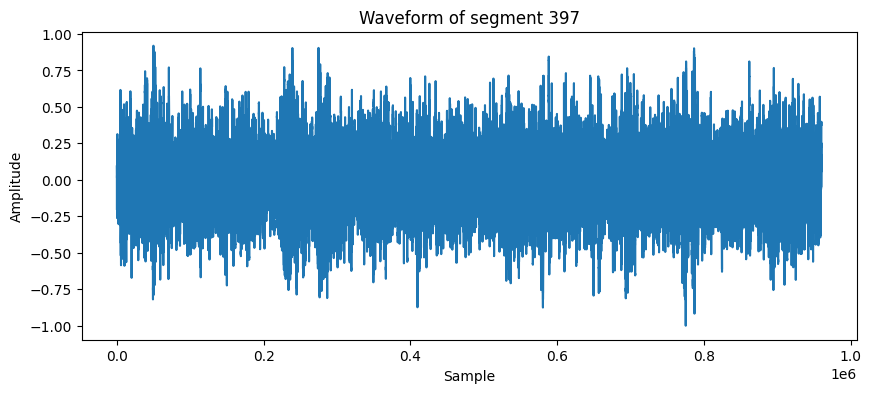

RMS: 0.22717425
Max amplitude: 0.9191284


In [11]:
import matplotlib.pyplot as plt
import librosa 

segment_path = "../data/processed/segment_397.wav"
y, sr = librosa.load(segment_path, sr=None)

plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Waveform of segment 397")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()
print("RMS:", librosa.feature.rms(y=y).mean())
print("Max amplitude:", y.max())

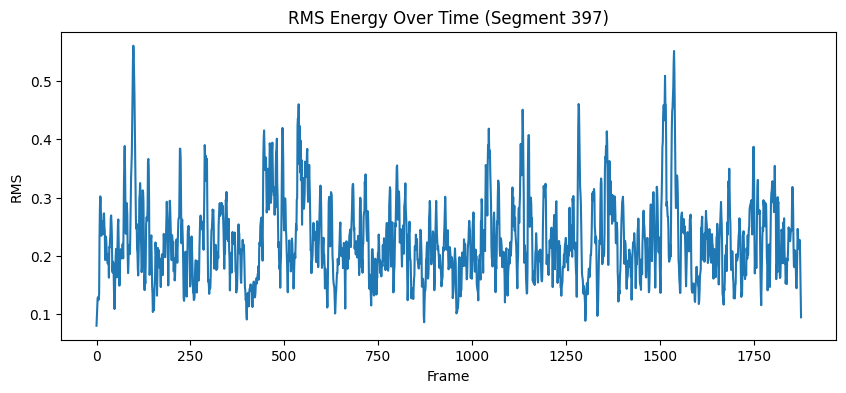

In [12]:
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

plt.figure(figsize=(10, 4))
plt.plot(rms)
plt.title("RMS Energy Over Time (Segment 397)")
plt.xlabel("Frame")
plt.ylabel("RMS")
plt.show()

In [21]:
df['manual_label'] = ['HVAC hum', 'typing burst', 'door slam', ...]
import seaborn as sns
import matplotlib.pyplot as plt

# Example: centroid vs. flatness
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='centroid', y='flatness', hue='manual_label')
plt.title("Centroid vs. Flatness (Colored by Manual Label)")
plt.tight_layout()
plt.show()


ValueError: Length of values (4) does not match length of index (644)

In [42]:
sns.pairplot(df[['rms', 'centroid', 'flatness', 'onset_density', 'manual_label']], hue='manual_label')
plt.show()


KeyError: "['manual_label'] not in index"

In [44]:
from scipy.signal import butter, lfilter

def lowpass_filter(y, sr, cutoff=3000, order=4):
    nyq = 0.5 * sr  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y_filtered = lfilter(b, a, y)
    return y_filtered

In [ ]:
lowpass_filter